## Plot Training Loss History of Cavity Problem
We already saved the training loss history in the saved checkpoints.



In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import os
import torch
import numpy as np
from matplotlib import pyplot as plt



In [3]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "./"))

if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.utils.logger import Logging
from src.utils.plot_loss import plot_loss_history
from src.utils.color import model_color
from src.poisson.cv_solver import CVPDESolver
from src.poisson.dv_solver import DVPDESolver
from src.poisson.classical_solver import Classical_Solver


/okyanus/users/afarea/anaconda3_2021/envs/pennylane_env/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 8000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
TEST_DATA_PKL = "./data/cavity.mat"
TEST_CHECKPOINT_PATH = os.path.join(PROJECT_ROOT, "testing_checkpoints/cavity")

logger = Logging(TEST_CHECKPOINT_PATH)
model_dirname = logger.get_output_dir()



In [5]:


# dv_angle_circuit19 = "./checkpoints/cavity/2025-01-21_16-02-04-709172"
# dv_angle_circuit5 = "./checkpoints/cavity/2025-01-21_15-58-27-004581"
# dv_angle_alternate = "./checkpoints/cavity/2025-01-21_15-53-27-946694"
# dv_amp_alternate = "./checkpoints/cavity/2025-01-31_21-36-01-818020"
# dv_amp_circuit5 = "./checkpoints/cavity/2025-01-31_16-27-19-868931"
# dv_amp_circuit19 = "./checkpoints/cavity/2025-01-31_16-28-59-778131"
# cv1 = "./checkpoints/cavity/2025-01-31_19-43-39-820449"
# classical= "./checkpoints/cavity/2025-01-25_16-54-26-160510"




dv_angle_circuit19 = (
        "./log_files/checkpoints/cavity/2025-02-06_19-28-34-814985"  # sim_circ_13_half
)
dv_angle_circuit5 = (
    "./log_files/checkpoints/cavity/2025-02-06_19-28-52-910332"  # circ_15
)
dv_angle_alternate = (
    "./log_files/checkpoints/cavity/2025-02-06_19-27-57-462145"  # sim_circ_13_half
)
dv_amp_alternate = (
        "./log_files/checkpoints/cavity/2025-02-06_18-44-40-359259"  # sim_circ_13_half

)
dv_amp_circuit5 = (
        "./log_files/checkpoints/cavity/2025-02-06_18-29-51-200273"  # circ_15
)
dv_amp_circuit19 = ( 
                    "./log_files/checkpoints/cavity/2025-02-06_18-41-52-938544"  # sim_circ_13_half
)
cv1 = (
        "./log_files/checkpoints/cavity/2025-02-06_22-52-49-345794"  # sim_circ_13_half
)

gcv = (
        "./log_files/checkpoints/cavity/2025-02-09_19-13-42-309529"  # sim_circ_13_half
)

classical= (
    "./log_files/checkpoints/cavity/2025-02-09_22-46-51-012656"
    )

# classical= (
#     "./log_files/checkpoints/cavity/2025-02-08_22-41-44-011874"
#     )

MODEL_PATH_LIST = {
    dv_angle_circuit19: "dv",
    dv_angle_circuit5: "dv",
    dv_angle_alternate: "dv",
    dv_amp_alternate: "dv",
    dv_amp_circuit5: "dv",
    dv_amp_circuit19: "dv",
    cv1: "cv",
    gcv: "cv",
    classical: "classical",
}

MODEL_Type_LIST = {
    dv_angle_circuit19: "angle_circuit19",
    dv_angle_circuit5: "angle_circuit5",
    dv_angle_alternate: "angle_alternate",
    dv_amp_alternate: "amp_alternate",
    dv_amp_circuit5: "amp_circuit5",
    dv_amp_circuit19: "amp_circuit19",
    cv1: "cv",
    gcv: "gcv",
    classical: "classical",
}


In [12]:


all_loss_history = {}

for  model_path,solver in MODEL_PATH_LIST.items():

    if solver == "cv":
        state = CVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = CVPDESolver(state["args"], logger)

        model.preprocessor.load_state_dict(state["preprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])
        model.postprocessor.load_state_dict(state["postprocessor"])

    elif solver == "classical":
        state = Classical_Solver.load_state(os.path.join(model_path, "model.pth"))
        model = Classical_Solver(state["args"], logger)

    else:
        state = DVPDESolver.load_state(os.path.join(model_path, "model.pth"))
        model = DVPDESolver(state["args"], logger)
        model.preprocessor.load_state_dict(state["preprocessor"])
        model.postprocessor.load_state_dict(state["postprocessor"])
        model.quantum_layer.load_state_dict(state["quantum_layer"])

    model.logger = logger
    # for key, value in model.args.items():
    #     model.logger.print(f"{key} : {value}")
    model.logger.print(f"Method used : , {MODEL_Type_LIST[model_path]}")
    model.logger.print(f"Totoal number of iterations : , {len(state['loss_history'])}")
    model.logger.print(f"The final loss : , {state['loss_history'][-1]}")
    total_params = sum(p.numel() for p in model.parameters())
    logger.print(f"Total number of parameters: {total_params}")

    # # Print total number of parameters
    # total_params = sum(p.numel() for p in model.parameters())
    # model.logger.print(f"Total number of parameters: {total_params}")

    all_loss_history[MODEL_Type_LIST[model_path]] = state["loss_history"]

    

INFO:src.utils.logger:Method used : , angle_circuit19
INFO:src.utils.logger:Totoal number of iterations : , 13650
INFO:src.utils.logger:The final loss : , 0.09591094404459
INFO:src.utils.logger:Total number of parameters: 928
INFO:src.utils.logger:Method used : , angle_circuit5
INFO:src.utils.logger:Totoal number of iterations : , 9350
INFO:src.utils.logger:The final loss : , 0.09743905067443848
INFO:src.utils.logger:Total number of parameters: 988
INFO:src.utils.logger:Method used : , angle_alternate
INFO:src.utils.logger:Totoal number of iterations : , 12550
INFO:src.utils.logger:The final loss : , 0.12204143404960632
INFO:src.utils.logger:Total number of parameters: 933
INFO:src.utils.logger:Method used : , amp_alternate
INFO:src.utils.logger:Totoal number of iterations : , 17800
INFO:src.utils.logger:The final loss : , 0.11402426660060883
INFO:src.utils.logger:Total number of parameters: 933
INFO:src.utils.logger:Method used : , amp_circuit5
INFO:src.utils.logger:Totoal number of i

Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_19-28-34-814985/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_19-28-52-910332/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_19-27-57-462145/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_18-44-40-359259/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_18-29-51-200273/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_18-41-52-938544/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-06_22-52-49-345794/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-09_19-13-42-309529/model.pth
Model state loaded from ./log_files/checkpoints/cavity/2025-02-09_22-46-51-012656/model.pth


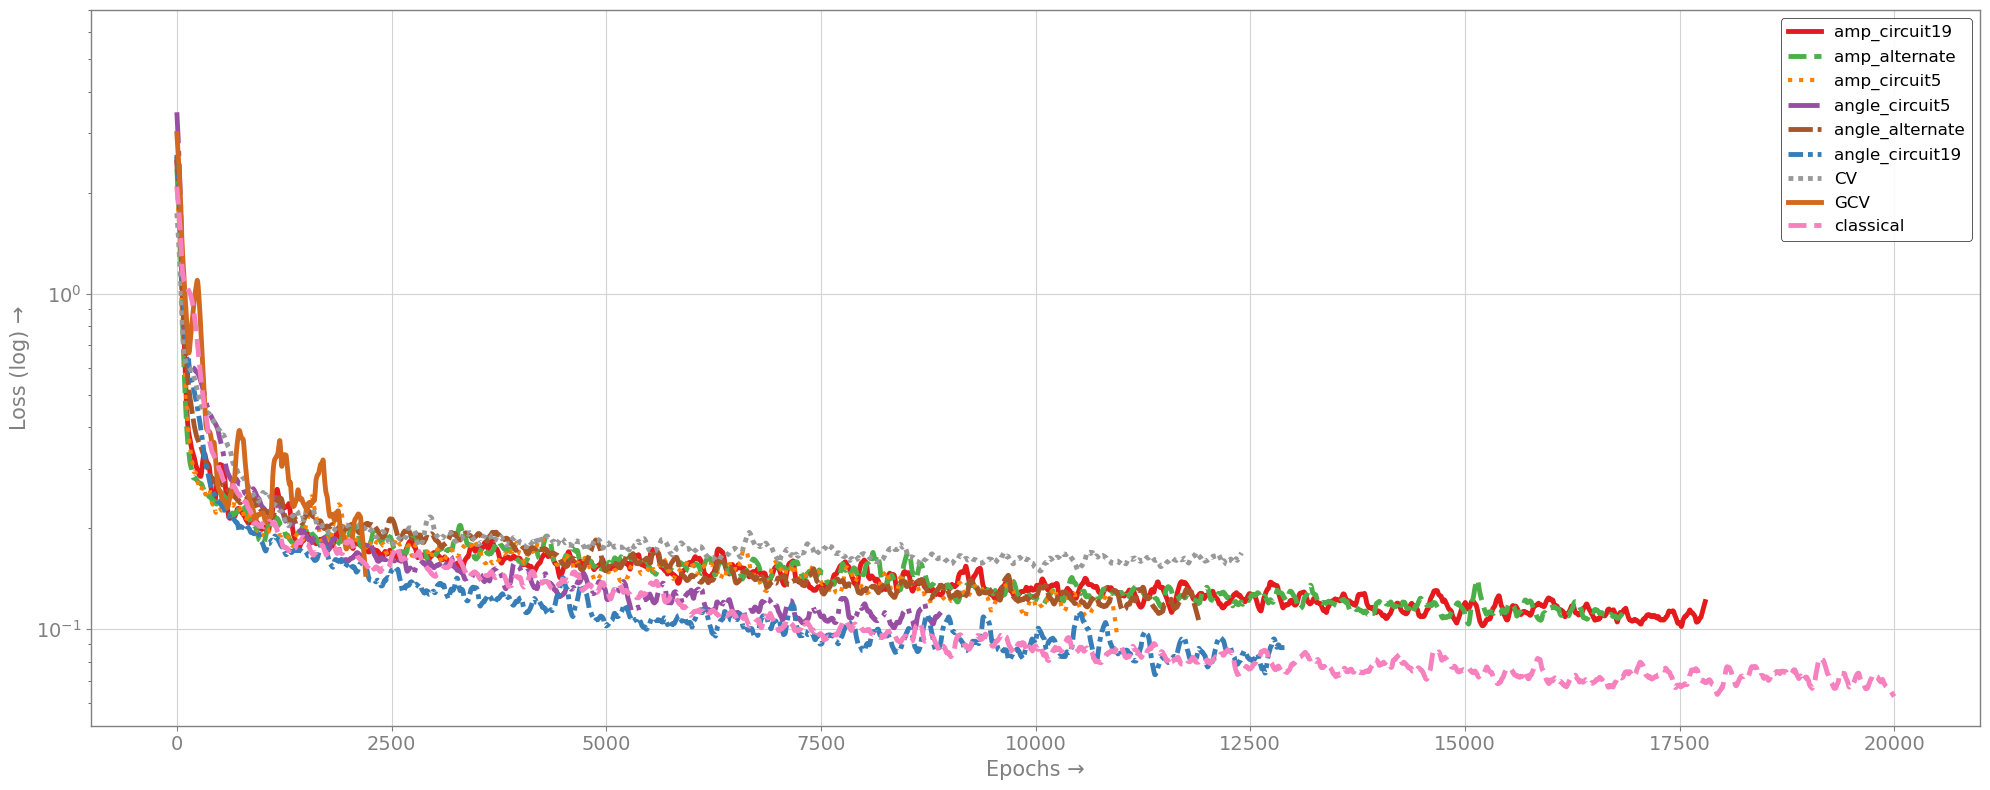

In [9]:
data_list = [
    {
        "data": all_loss_history["amp_circuit19"],
        "color": model_color["amp_circuit19"],
        "name": "amp_circuit19",
        "alpha": 1.0,  # Increased from 0.9
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-",
        "linewidth": 3.5  # Added line width
    },
    {
        "data": all_loss_history["amp_alternate"],
        "color": model_color["amp_alternate"],
        "name": "amp_alternate",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "--",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["amp_circuit5"],
        "color": model_color["amp_circuit5"],
        "name": "amp_circuit5",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": ":",
        "linewidth": 3.0  # Slightly thicker for dotted lines
    },
    {
        "data": all_loss_history["angle_circuit5"],
        "color": model_color["angle_circuit5"],
        "name": "angle_circuit5",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-.",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["angle_alternate"],
        "color": model_color["angle_alternate"],
        "name": "angle_alternate",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (5, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["angle_circuit19"],
        "color": model_color["angle_circuit19"],
        "name": "angle_circuit19",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (3, 1, 1, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["cv"],
        "color": model_color["cv"],
        "name": "CV",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": (0, (1, 1)),
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["gcv"],
        "color": model_color["gcv"],
        "name": "GCV",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "-",
        "linewidth": 3.5
    },
    {
        "data": all_loss_history["classical"],
        "color": model_color["classical"],
        "name": "classical",
        "alpha": 1.0,
        "window": 100,
        "show_avg": False,
        "show_lower": False,
        "linestyle": "--",
        "linewidth": 3.5
    }
]

plot_loss_history(
    data_list,
    os.path.join(logger.get_output_dir(), "loss_history_cavity.png"),
    y_max=7,
)